In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets('mnist/', one_hot = True)

In [12]:
x_treinamento = mnist.train.images
y_treinamento = mnist.train.labels
x_teste = mnist.test.images
y_teste = mnist.test.labels
x_treinamento.shape

(55000, 784)

In [6]:
x_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
y_treinamento.shape

(55000, 10)

In [9]:
y_treinamento

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [13]:
x_teste.shape

(10000, 784)

Text(0.5, 1.0, 'Classe: 3')

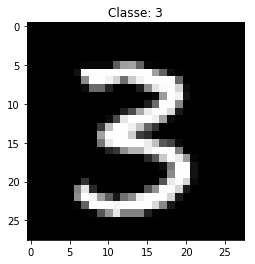

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.imshow(x_treinamento[102].reshape((28, 28)), cmap = 'gray')
plt.title('Classe: ' + str(np.argmax(y_treinamento[102])))

In [21]:
x_batch, y_batch = mnist.train.next_batch(64)
x_batch.shape

(64, 784)

In [22]:
#Forecasters Attributes
neuronios_entrada = x_treinamento.shape[1]
neuronios_entrada

784

In [23]:
#Neurons
neuronios_oculta1 = int((x_treinamento.shape[1] + y_treinamento.shape[1]) / 2)
neuronios_oculta1

397

In [24]:
#Neurons
neuronios_oculta2 = neuronios_oculta1
neuronios_oculta3 = neuronios_oculta1
neuronios_saida = y_treinamento.shape[1]
neuronios_saida

10

In [25]:
import tensorflow as tf

In [26]:
#Weights
w = {'oculta1': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta1])),
     'oculta2': tf.Variable(tf.random_normal([neuronios_oculta1, neuronios_oculta2])),
     'oculta3': tf.Variable(tf.random_normal([neuronios_oculta2, neuronios_oculta3])),
     'saida':   tf.Variable(tf.random_normal([neuronios_oculta3, neuronios_saida]))}

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
#Bias
b = {'oculta1': tf.Variable(tf.random_normal([neuronios_oculta1])),
     'oculta2': tf.Variable(tf.random_normal([neuronios_oculta2])),
     'oculta3': tf.Variable(tf.random_normal([neuronios_oculta3])),
     'saida': tf.Variable(tf.random_normal([neuronios_saida]))}

In [29]:
#Placeholders
xph = tf.placeholder('float', [None, neuronios_entrada])
yph = tf.placeholder('float', [None, neuronios_saida])

In [35]:
def mlp(x, w, b):
    camada_oculta1 = tf.nn.relu(tf.add(tf.matmul(x, w['oculta1']), b['oculta1']))
    camada_oculta2 = tf.nn.relu(tf.add(tf.matmul(camada_oculta1, w['oculta2']), b['oculta2']))
    camada_oculta3 = tf.nn.relu(tf.add(tf.matmul(camada_oculta2, w['oculta3']), b['oculta3']))
    camada_saida = tf.add(tf.matmul(camada_oculta3, w['saida']), b['saida'])
    return camada_saida

In [36]:
#Model
modelo = mlp(xph, w, b)
erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = modelo, labels = yph))
otimizador = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(erro)

In [49]:
previsoes = tf.nn.softmax(modelo)
previsoes_corretas = tf.equal(tf.argmax(previsoes, 1), tf.argmax(yph, 1))
taxa_acerto = tf.reduce_mean(tf.cast(previsoes_corretas, tf.float32))

In [54]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoca in range(10000):
        x_batch, y_batch = mnist.train.next_batch(128)
        _, custo = sess.run([otimizador, erro], feed_dict = {xph: x_batch, yph: y_batch})
        if epoca % 100 == 0:
            acc = sess.run([taxa_acerto], feed_dict = {xph: x_batch, yph: y_batch})
            print('Epoch: ' + str((epoca + 1)) + ' Error:' + str(custo) + ' Accuracy: ' + str(acc))
            
    print('Training Complete!')
    print(sess.run(taxa_acerto, feed_dict = {xph: x_teste, yph: y_teste}))

Epoch: 1 Error:29088.64 Accuracy: [0.1015625]
Epoch: 101 Error:11436.285 Accuracy: [0.2421875]
Epoch: 201 Error:6083.291 Accuracy: [0.453125]
Epoch: 301 Error:4506.525 Accuracy: [0.5234375]
Epoch: 401 Error:3994.7305 Accuracy: [0.53125]
Epoch: 501 Error:3691.8442 Accuracy: [0.6328125]
Epoch: 601 Error:2534.6318 Accuracy: [0.6953125]
Epoch: 701 Error:3045.8696 Accuracy: [0.6796875]
Epoch: 801 Error:1864.3873 Accuracy: [0.734375]
Epoch: 901 Error:1574.5846 Accuracy: [0.78125]
Epoch: 1001 Error:2010.5985 Accuracy: [0.765625]
Epoch: 1101 Error:2123.6753 Accuracy: [0.7890625]
Epoch: 1201 Error:1545.0107 Accuracy: [0.7890625]
Epoch: 1301 Error:2051.5962 Accuracy: [0.7578125]
Epoch: 1401 Error:1152.8289 Accuracy: [0.84375]
Epoch: 1501 Error:1504.2078 Accuracy: [0.8203125]
Epoch: 1601 Error:1363.9788 Accuracy: [0.8359375]
Epoch: 1701 Error:1467.0771 Accuracy: [0.828125]
Epoch: 1801 Error:1120.8427 Accuracy: [0.8359375]
Epoch: 1901 Error:1272.2765 Accuracy: [0.8359375]
Epoch: 2001 Error:825.023

In [46]:
y_teste

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])